In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!nvidia-smi


Sat Aug  9 16:49:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [10]:
img = image.load_img('/content/drive/MyDrive/Mood Faces/Training/Happy/3.jpg')

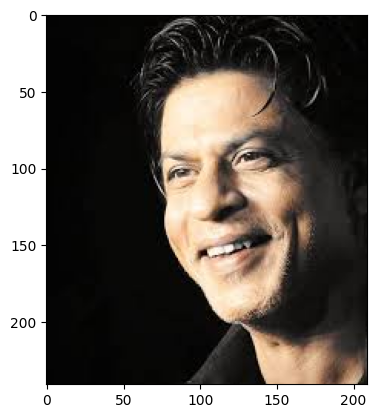

In [11]:
plt.imshow(img)

array([[[ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [ 1,  3,  3],
        [ 1,  3,  3],
        [ 1,  3,  3]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [ 1,  3,  3],
        [ 1,  3,  3],
        [ 1,  3,  3]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [ 1,  3,  3],
        [ 1,  3,  3],
        [ 1,  3,  3]],

       ...,

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3],
        ...,
        [36, 50, 49],
        [19, 30, 28],
        [26, 30, 31]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3],
        ...,
        [32, 43, 41],
        [18, 24, 23],
        [17, 21, 22]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3],
        ...,
        [21, 25, 26],
        [16, 18, 19],
        [20, 22, 23]]], dtype=uint8)
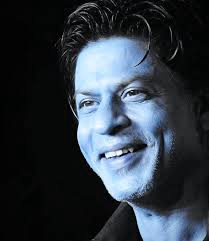

In [13]:
i1 = cv2.imread('/content/drive/MyDrive/Mood Faces/Training/Happy/3.jpg')
i1

In [14]:
i1.shape

(241, 209, 3)

In [15]:
train = ImageDataGenerator(rescale = 1/200)
validataion = ImageDataGenerator(rescale = 1/200)

In [16]:
train_dataset = train.flow_from_directory(r'/content/drive/MyDrive/Mood Faces/Training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'/content/drive/MyDrive/Mood Faces/Validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 10 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [17]:
train_dataset.class_indices

{'Happy': 0, 'Unhappy': 1}

In [18]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')]) # Closing parenthesis added here

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [33]:
model_fit = model.fit(train_dataset,epochs = 30)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 8.9119e-05
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 8.6095e-05
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 4.7364e-05
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 6.2459e-05
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 3.8513e-05
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 4.0344e-05
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 3.0631e-05
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 2.1415e-05
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 1.9180e-05
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 1.6605e-05
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 2.2746e-05
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [34]:
dir_path = r'/content/drive/MyDrive/Mood Faces/Testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
10.jpg


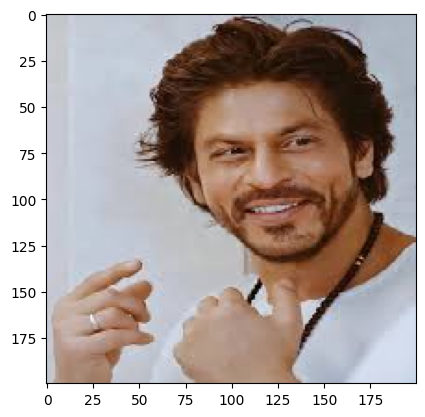

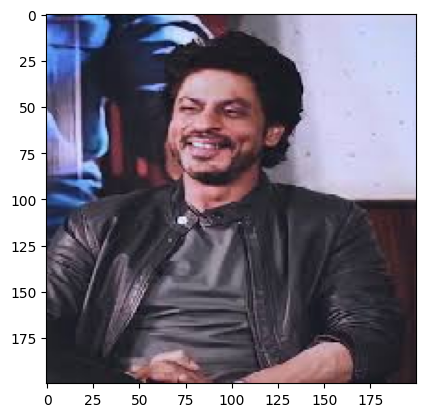

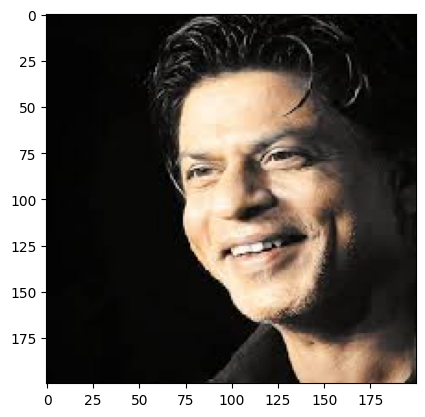

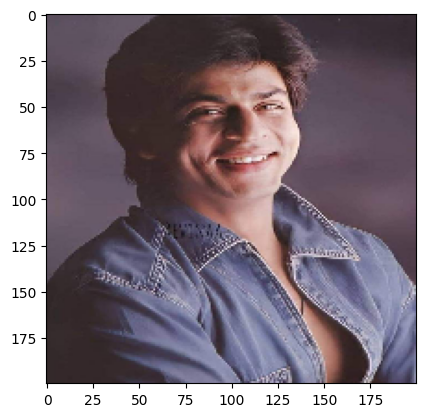

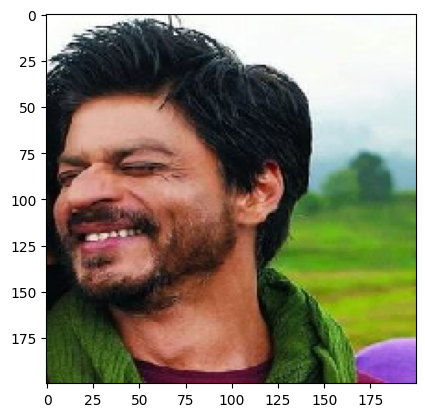

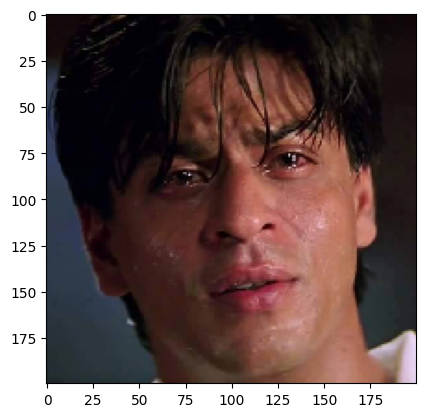

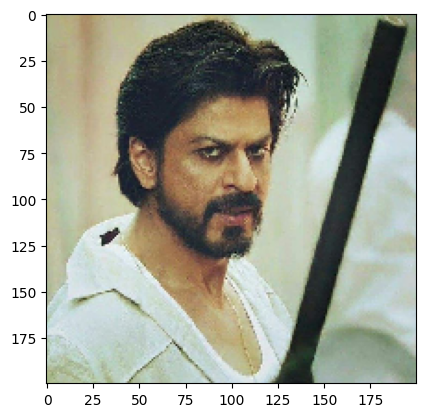

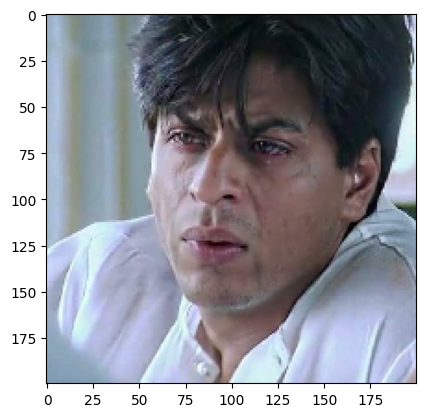

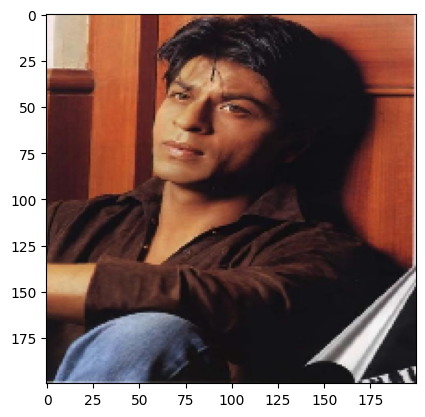

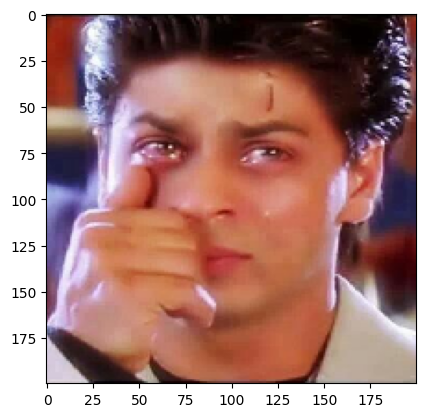

In [35]:
dir_path = r'/content/drive/MyDrive/Mood Faces/Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

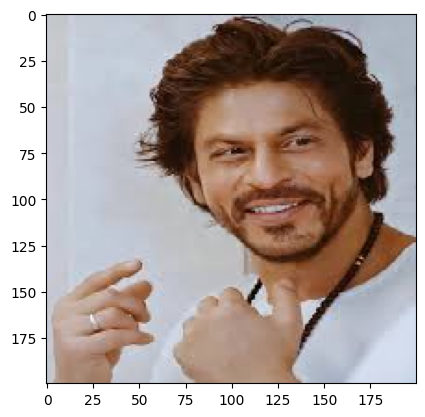

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 i am not happy


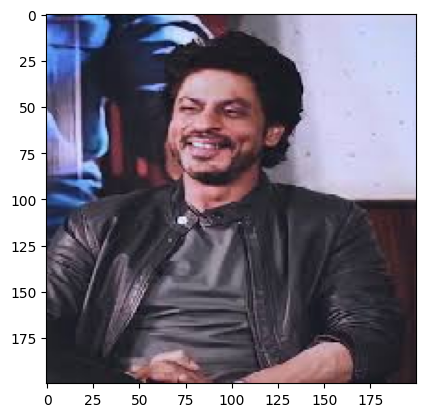

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
 i am not happy


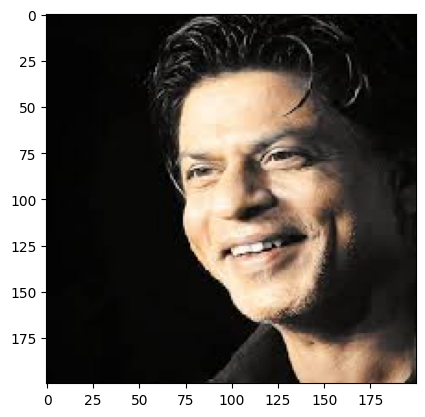

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
 i am not happy


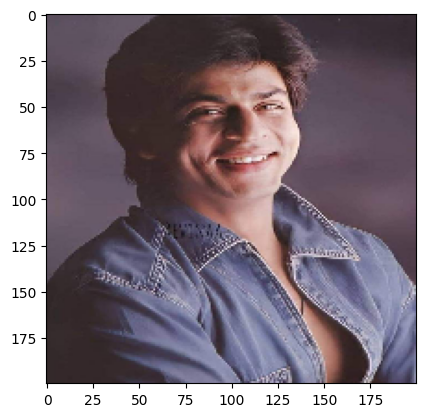

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
 i am not happy


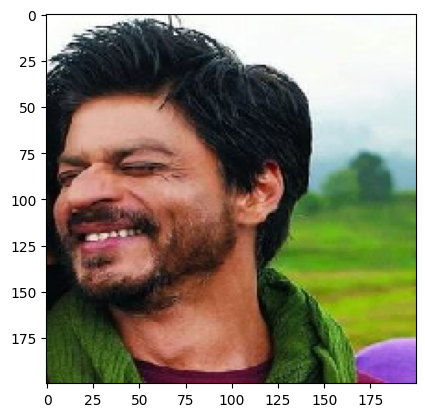

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
 i am not happy


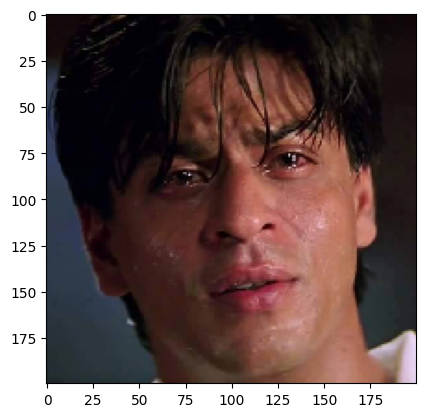

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
i am happy


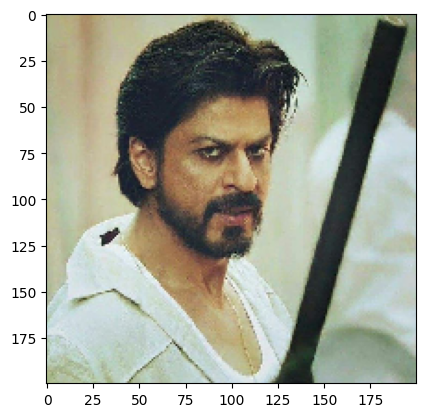

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
i am happy


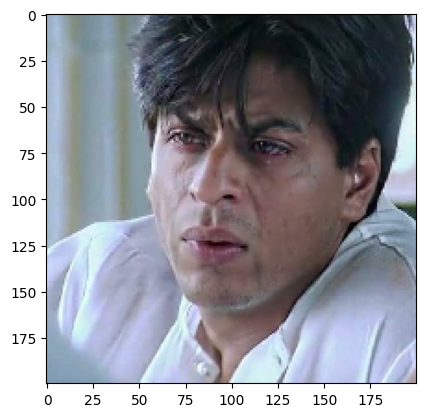

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am happy


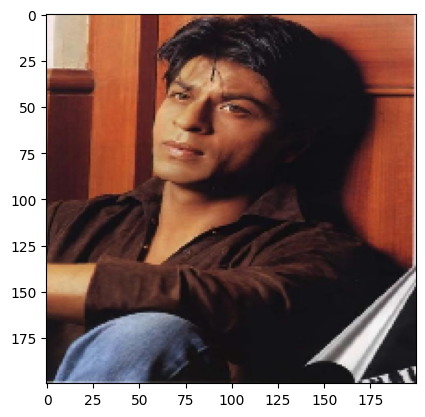

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
i am happy


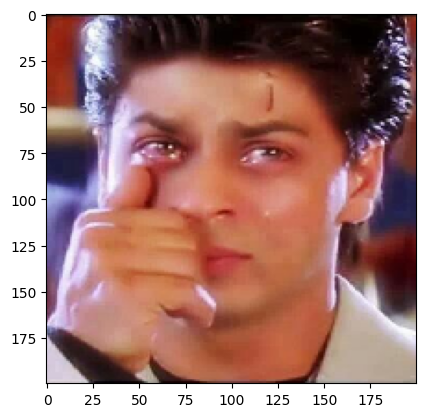

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
i am happy


In [36]:
dir_path = r'/content/drive/MyDrive/Mood Faces/Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')